# Deep Learning for Computer Vision with TensorFlow 2.0

Table of contents:
[Lab 0](https://colab.research.google.com/github/embedded-vision/dlcvtf2/blob/master/00_test_install.ipynb) | 
[Lab 1](https://colab.research.google.com/github/embedded-vision/dlcvtf2/blob/master/01_linear_regression.ipynb) | 
[Lab 2](https://colab.research.google.com/github/embedded-vision/dlcvtf2/blob/master/02_tensorflow_logistic_regression.ipynb) | 
[Lab 3a](https://colab.research.google.com/github/embedded-vision/dlcvtf2/blob/master/03a_tensorflow_deep_network.ipynb) | 
[Lab 3b](https://colab.research.google.com/github/embedded-vision/dlcvtf2/blob/master/03b_deep_mnist_visualize.ipynb) | 
[Lab 4](https://colab.research.google.com/github/embedded-vision/dlcvtf2/blob/master/04_mnist_cnn.ipynb) | 
[Lab 5](https://colab.research.google.com/github/embedded-vision/dlcvtf2/blob/master/05_data_prep.ipynb) | 
[Lab 6](https://colab.research.google.com/github/embedded-vision/dlcvtf2/blob/master/06_transfer_learning.ipynb) | 

# Lab 1: Linear Regression

If you ever want to start over just go to the menu at the top and select Runtime ->  Restart runtime.  (Please do not use Runtime -> Reset all runtimes.)

In this exerise you will apply what you learned in the lecture to experiment with a working linear regression model. The model will be very similar to the one discussed in the lecture. You will run the Colab cells below, to create the model, train the model, and test the output.

This first cell makes sure that you have TensorFlow 2.0 installed, and imports needed libraries.

In [4]:
# Cell 1.1
import tensorflow as tf
if tf.__version__ != "2.0.0-alpha0":
    !pip install tensorflow-gpu==2.0.0-alpha0
    print("Please go to Runtime -> restart runtime and then, once that finishes, rerun this cell.")

import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

# A special command for IPython Notebooks that
# intructs Matplotlib to display plots in the notebook
%pylab inline

print ('cell finished')

Populating the interactive namespace from numpy and matplotlib
cell finished


This cell checks to make sure you are running on a GPU colab instance. If you don't, you'll need to change the runtime type.

In [5]:
# Cell 1.2
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU not found. Please go to Runtime -> Change runtime type and select a GPU hardware accelerator')
print ('Found GPU at: {}'.format(device_name))
print ('cell finished')

Found GPU at: /device:GPU:0


This next cell defines variables PERSQFT and BASE that will be used to generate the test data. Variable PERSQFT is the cost per house square foot divided by 1000. Variable BASE helps with tiny houses so that the price doesn't go to 0 for a very small house. (Notice that the price per sq ft is based on a cheap house in California)

Variables PERSQFT and BASE will be the correct values that the model tries to learn from the data. Here we are using them to generate the training data so that we can see if the model can learn those values.

Defining them in a separate cell allows you to easily change the values. You can experiment with the learning rate and number of EPOCHS to see if it makes a difference during training

In [6]:
# cell 1.3

PERSQFT = .4   # $400 per sq ft
BASE = .35     # $350K base price 

LEARNING_RATE = .01
EPOCHS = 200
ITEMS = 100

print ('cell finished')

cell finished


This cell uses the constants from the cell above with a standard python function to create the training data as shown in the lecture.

In [7]:
#cell 1.4

def make_noisy_data(w=PERSQFT, b=BASE, n=ITEMS):
    sqft = np.random.rand(n).astype(np.float32) * 6 # multiply by 6 for max sq ft of 6000
    noise = np.random.normal(scale=0.08, size=len(sqft))
    price = w * sqft + b + noise
    return sqft, price

print ('cell finished')

cell finished


This cell calls the make_noisy_data function and assigns the outputs to two variables sqft_train and price_train. Variable sqft_train will be the x values fed into your linear regression model and price_train will be the expected output.

In [8]:
# cell 1.5

sqft_train, price_train = make_noisy_data()


print ('cell finished')

cell finished


This cell plots our training data so that we can get an idea of its general distribution. It is a linear distribution with a bit of noise as specified in the function definition. You can experiment with different noise values to see how the results change.

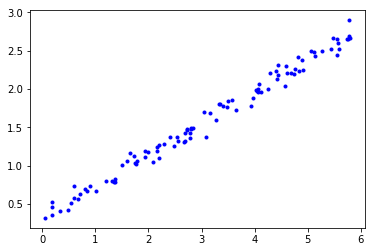

In [9]:
# cell 1.6

# Run this cell to plot the data.

pylab.plot(sqft_train, price_train, 'b.')


A Keras model will be used to describe the network. As discussed in the lecture, a Keras Dense layer includes variables for each input as well as a bias. The values of these variables will initially be random and learned by the training process. At the end of the training these values should approximate the per sq ft price and the base used to create the training data. Why wouldn't they be exact?

In [0]:
# cell 1.7

def model():
    model = keras.Sequential([
    layers.Dense(1, input_shape=[1])
  ])
    return model

print ('cell finished')

The next cell selects an optimizer to update the weight and bias values of the Keras Dense layer. We'll chose the stochastic gradient descent (SGD) optimizer, with a learning rate of 0.01.

In [0]:
# cell 1.8

optimizer = tf.keras.optimizers.SGD(0.01)

print ('cell finished')

The next cell calls the function that creates the Keras Sequential model. An instance of the model will be stored in variable m1 for use in the training process

In [0]:
# cell 1.9

m1 = model()

print ('cell finished')

Before the Keras model can be used it needs to be compiled. The compile will describe a number of parameters that will be used during the training and evaluation process. This includes the optimizer for training, the type of loss to be optimized, and the metrics to report. 

In this example the optimizer will be the one created above. The loss to optimize will be mse, or mean squared error. The metrics will report both mean squared error and mean absolute error. 

In [0]:
# cell 1.10

m1.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])

print ('cell finished')

The following cell calls the summary function on the Keras model. This function will report information about the structure of the Keras model. The report shows that the Keras model has one layer named dense of type Dense. The output shape is 1 and there are 2 trainable parameters. One parameter will be the input weight and the second will be the bias for the output. 

In [0]:
# cell 1.11

m1.summary()

print ('cell finished')

The next cell will try out the model before training so that we can see that the random weights and bias do not produce the correct results. The model needs to be trained first. The predict function expects an array of values so test_sqft is created as an array. That value is indexed to obtain the expected price. 

In [0]:
# cell 1.12

test_sqft = [[4.0]]
expPrice = test_sqft[0][0] * PERSQFT + BASE

outval = m1.predict(test_sqft)
print ("price should be [{}] but is {}".format(expPrice,outval))

This cell defines how the linear regression model is trained. The training will use the number of EPOCHS specified in the cell near the top to determine how many iterations to train. Each training iteration will update the values of w and b based on the loss calculated by the optimizer. 

The metrics are printed for each training epoch so that the progress of the training can be observed. The added value of this is that it can seen when the values start to stabilize and determine whether the learning rate and number of epochs are too small or too large.

In [0]:
# cell 1.13

history = m1.fit(
  sqft_train, price_train,
  epochs=EPOCHS, verbose=2)

print ('cell finished')

This cell simply prints out the values of our trainable values for price per sq ft and base price. The get_weights function will retrieve the weight values from the model. These are multiplied by 1000 to put them in the format used for describing the model. 

Since the weight and bias values are arrays, indexing is needed to retrieve them.

In [0]:
# cell 1.14

wval = m1.get_weights()[0][0][0]
bval = m1.get_weights()[1][0]
print(wval)
print (bval)

print('per sq ft = {}'.format(wval*1000))
print('base price = {}'.format(bval*1000))

Now that the training has run we can plot the values for w and b and see how closely they matched the training data. Ideally the line should bisect the training data. What would be reasons that it did not?

In [0]:
# cell 1.15

print ("w: %f, b: %f" % (wval, bval))
pylab.plot(sqft_train, price_train, 'b.')
x = np.linspace(0,6,100)
y = x * wval + bval
pylab.plot(x,y, 'r.')

As you can see the line fits the data pretty well with the default parameters for EPOCHS and LEARNING_RATE. Are those optimal values? Can you get just as good results with different values?

Also experiment with the price per sq ft and base price to make sure the model can still learn the values

In [10]:
tf.test.is_gpu_available(
    cuda_only=False,
    min_cuda_compute_capability=None
)

True